In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score



In [2]:
dataset = pd.read_csv('bank.csv', sep=';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
dataset.describe()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
dataset.isnull().sum()
dataset.duplicated().sum() 

0

In [5]:
for col in dataset.columns:
    print(f'${col} has', f'and {len(dataset[col].unique())} unique values')

    

$age has and 67 unique values
$job has and 12 unique values
$marital has and 3 unique values
$education has and 4 unique values
$default has and 2 unique values
$balance has and 2353 unique values
$housing has and 2 unique values
$loan has and 2 unique values
$contact has and 3 unique values
$day has and 31 unique values
$month has and 12 unique values
$duration has and 875 unique values
$campaign has and 32 unique values
$pdays has and 292 unique values
$previous has and 24 unique values
$poutcome has and 4 unique values
$y has and 2 unique values


In [7]:
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = dataset[col].str.strip()
        dataset[col] = dataset[col].str.lower()

In [8]:
import string

for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = dataset[col].str.rstrip().str.replace(f"[{string.punctuation}]+$", "", regex=True)

In [9]:
dataset.shape

(4521, 17)

In [10]:
dataset = dataset.loc[dataset['balance'] <= 6000]
dataset = dataset.loc[dataset['duration'] <= 1500]
dataset = dataset.loc[dataset['campaign'] <= 15]
dataset = dataset.loc[dataset['pdays'] <= 400]
dataset = dataset.loc[dataset['previous'] <= 6]

In [11]:
dataset.shape

(4124, 17)

<Figure size 1000x1000 with 0 Axes>

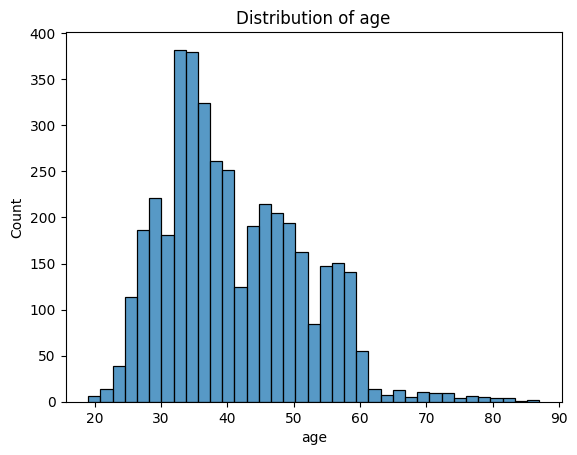

<Figure size 1000x1000 with 0 Axes>

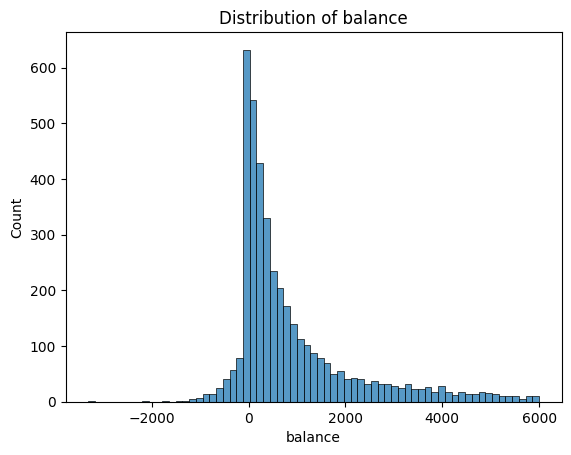

<Figure size 1000x1000 with 0 Axes>

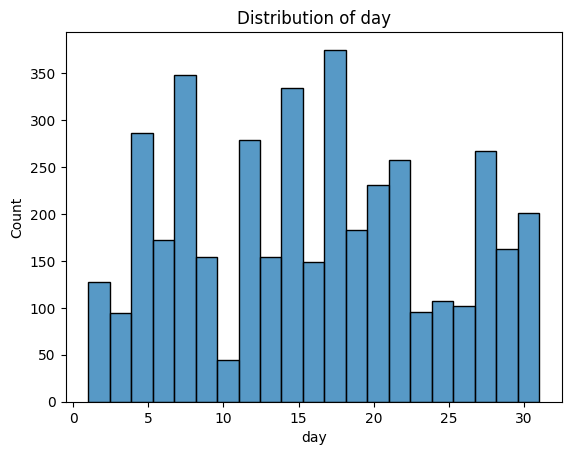

<Figure size 1000x1000 with 0 Axes>

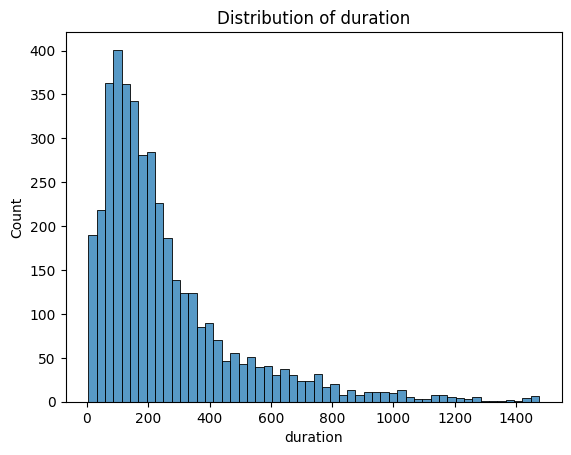

<Figure size 1000x1000 with 0 Axes>

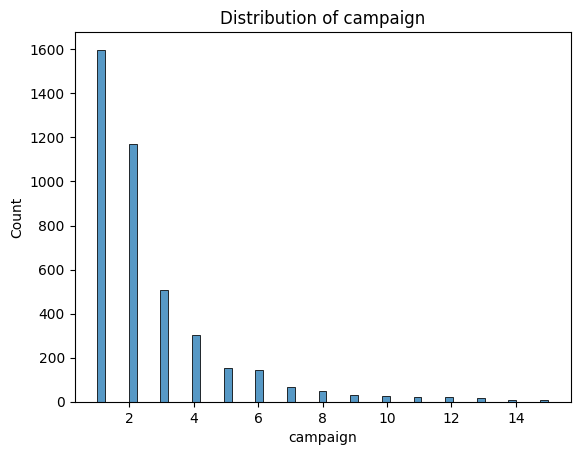

<Figure size 1000x1000 with 0 Axes>

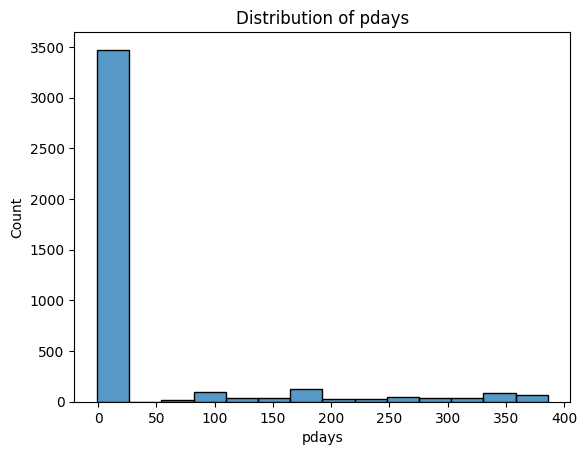

<Figure size 1000x1000 with 0 Axes>

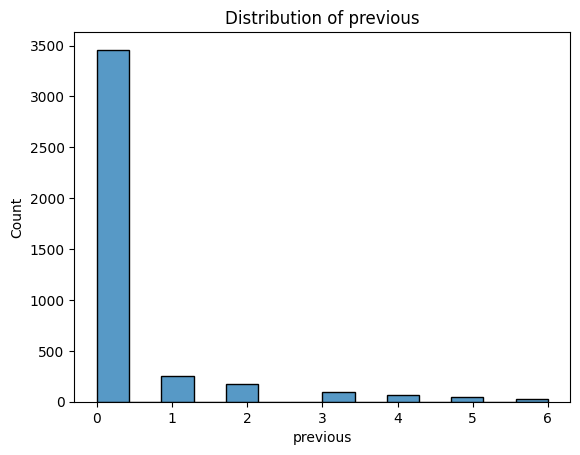

In [12]:
numerical_cols = dataset.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 10))
    plt.figure()
    sns.histplot (dataset[col])
    plt.title(f'Distribution of {col}')
    plt.show()


Text(0.5, 1.0, 'Age vs Balance')

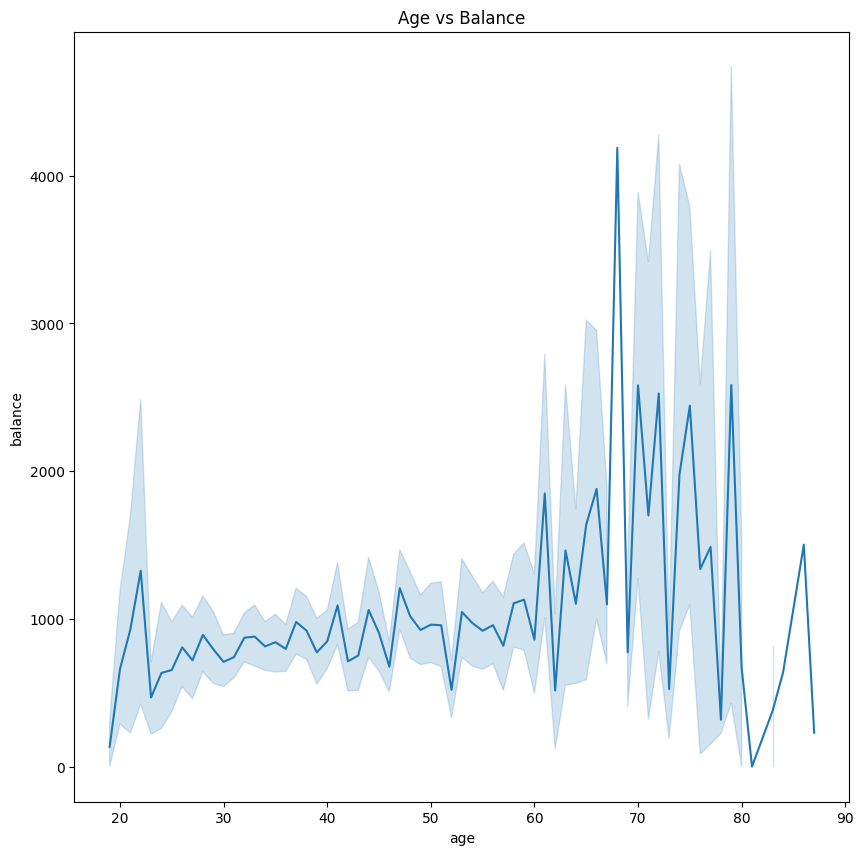

In [13]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='age', y='balance', data=dataset)
plt.title('Age vs Balance')

Text(0.5, 1.0, 'Job Distribution')

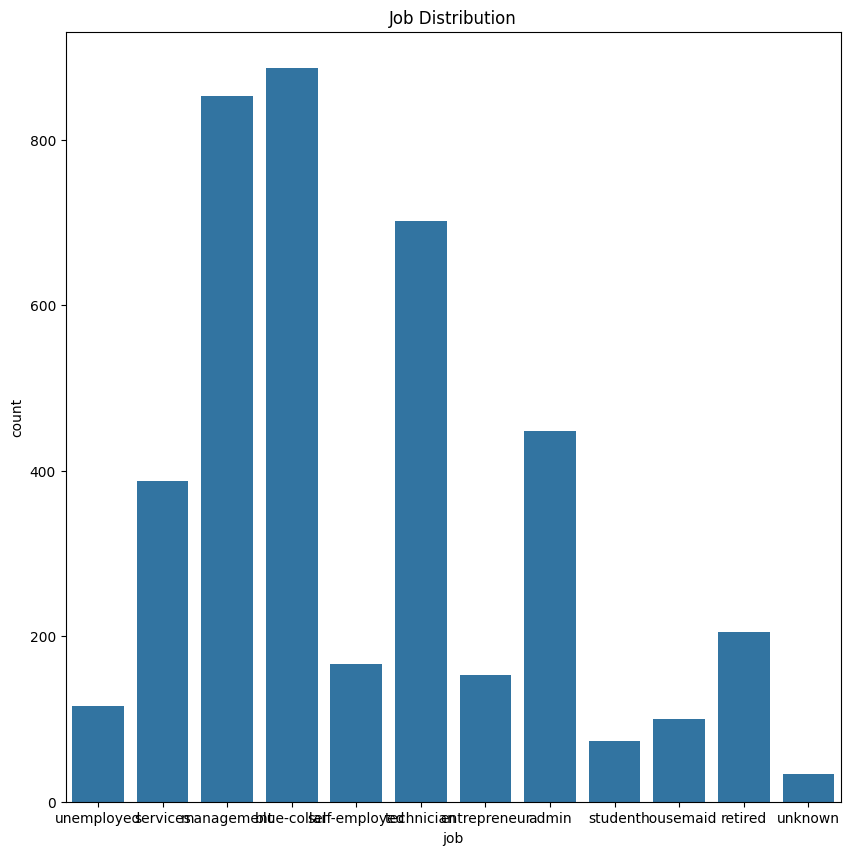

In [14]:
plt.figure(figsize=(10, 10))
sns.countplot(x='job', data=dataset)
plt.title('Job Distribution')


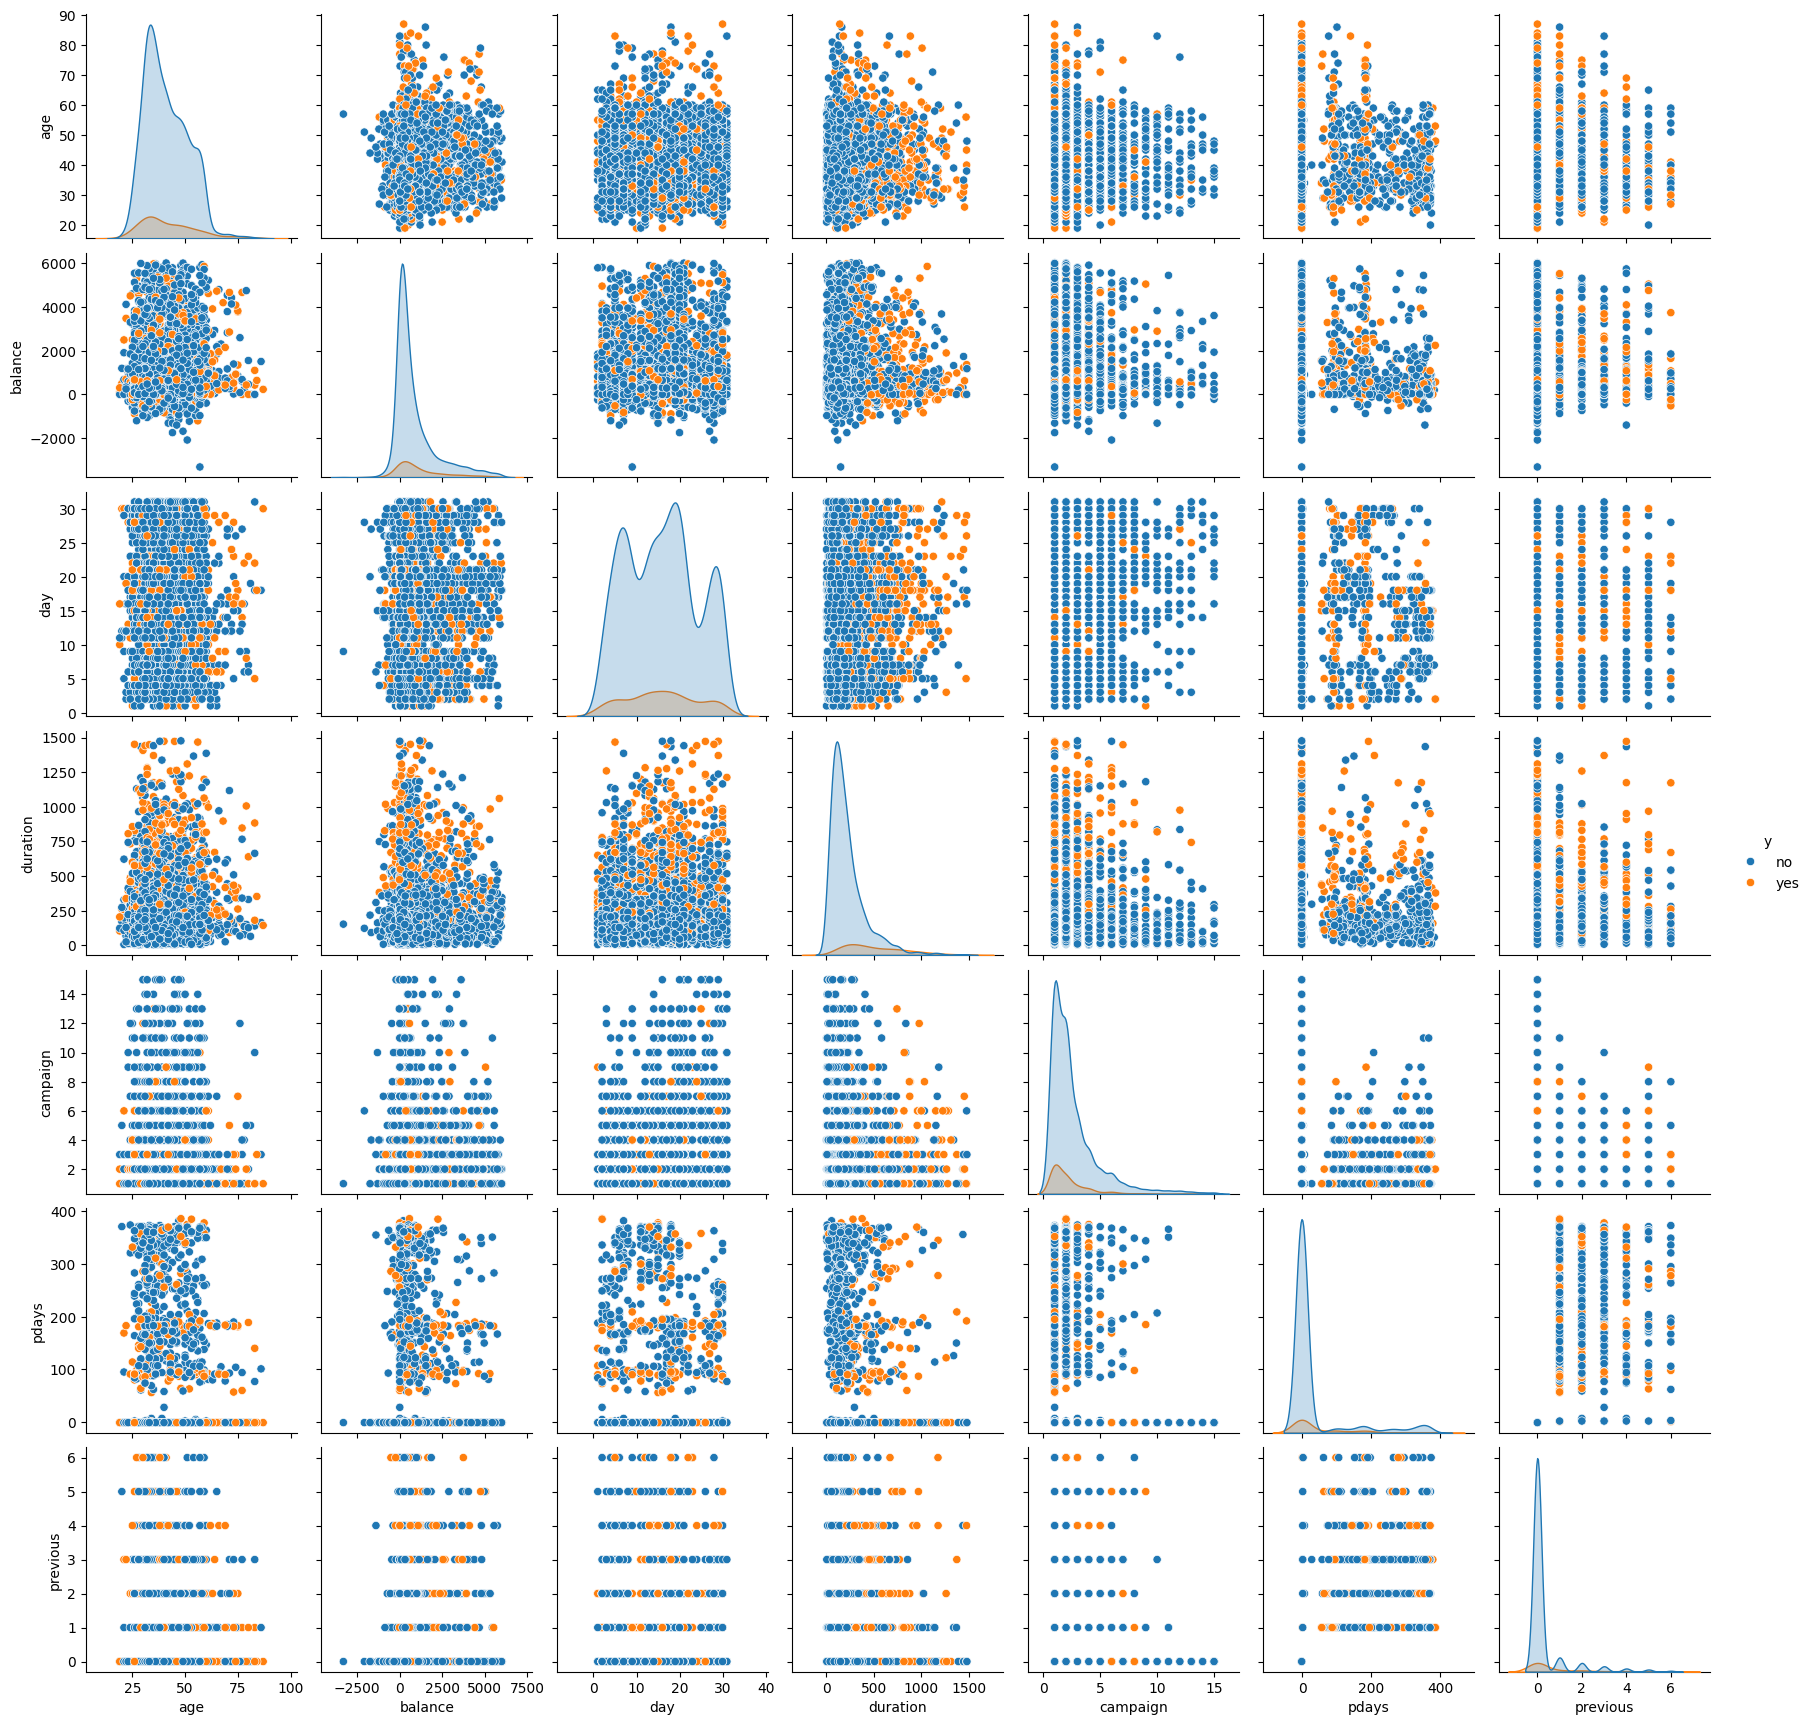

In [15]:
sns.pairplot(dataset, hue='y')

<Axes: xlabel='age', ylabel='balance'>

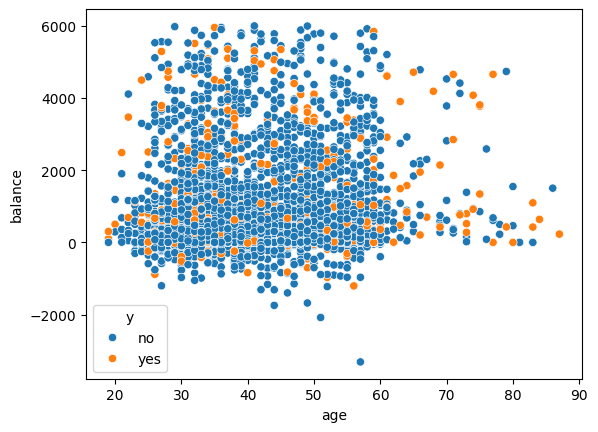

In [16]:
sns.scatterplot(x='age', y='balance', data=dataset, hue='y')

([<matplotlib.patches.Wedge at 0x1eb1e2d58e0>,
 [Text(-0.37447184429379893, -1.034297267632087, 'No'),
  Text(0.3744718927127486, 1.0342972501017935, 'Yes')],
 [Text(-0.2042573696147994, -0.5641621459811383, '88.9%'),
  Text(0.20425739602513557, 0.56416213641916, '11.1%')])

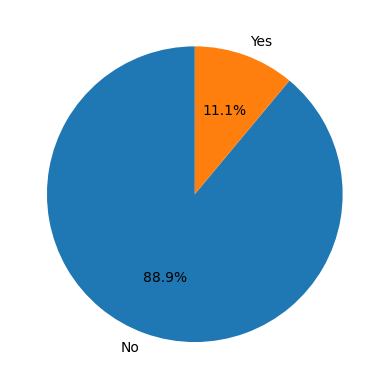

In [17]:
plt.pie(dataset['y'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x1eb1e4b85c0>,
 [Text(-1.0978019519303797, -0.0695044914940656, 'secondary'),
  Text(0.9434207169795206, -0.5656477267468221, 'tertiary'),
  Text(0.7352545080407961, 0.8181691807967879, 'primary'),
  Text(0.14122451560008792, 1.0908967119730084, 'unknown')],
 [Text(-0.598801064689298, -0.03791154081494486, '52.0%'),
  Text(0.5145931183524657, -0.30853512368008473, '28.8%'),
  Text(0.40104791347679786, 0.4462740986164297, '15.1%'),
  Text(0.0770315539636843, 0.5950345701670954, '4.1%')])

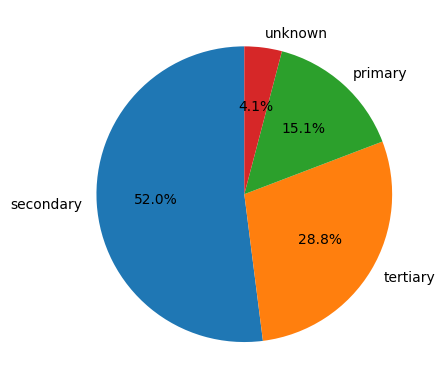

In [18]:
plt.pie(dataset["education"].value_counts(), labels=["secondary", "tertiary", "primary", "unknown"], autopct='%1.1f%%', startangle=90)

In [19]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no


<Axes: xlabel='day', ylabel='balance'>

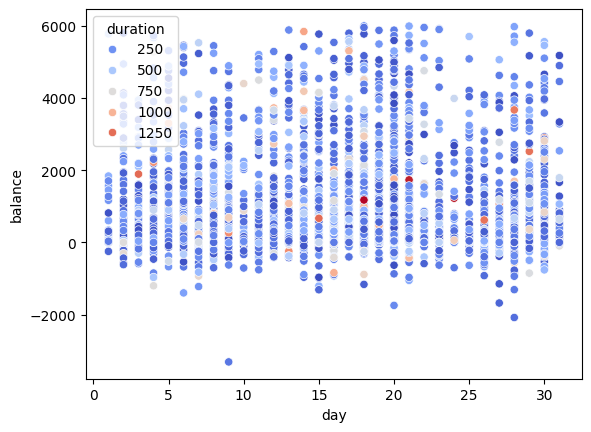

In [20]:
sns.scatterplot(x='day', y='balance', data=dataset, hue='duration', palette='coolwarm')

<Axes: xlabel='day', ylabel='balance'>

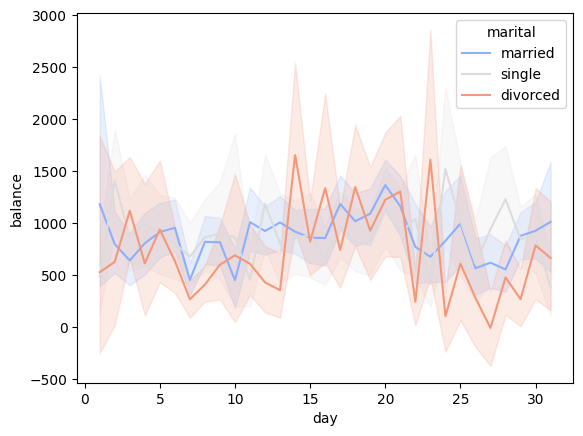

In [21]:
sns.lineplot(x='day', y='balance', data=dataset, hue='marital', palette='coolwarm')

<Axes: xlabel='age', ylabel='balance'>

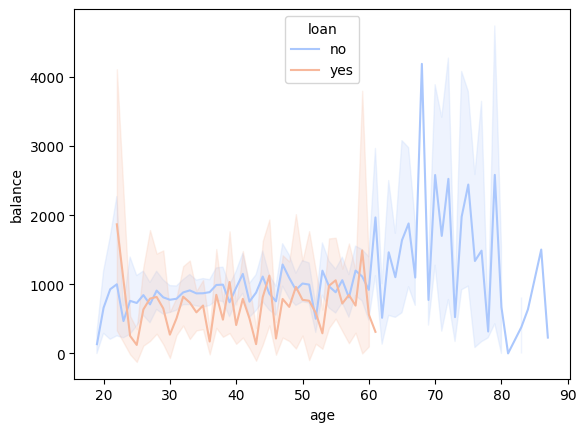

In [22]:
sns.lineplot(x='age', y='balance', data=dataset,hue="loan", palette='coolwarm')

In [23]:
category = dataset.select_dtypes(include=['object']).columns

for category in category:
    dataset[category] = LabelEncoder().fit_transform(dataset[category])

dataset_scaler =  MinMaxScaler().fit_transform(dataset)

In [24]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,7,2,1,0,473,1,0,0,7,5,624,5,-1,0,3,0
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0


In [25]:
dataset_scaler = pd.DataFrame(dataset_scaler, columns=dataset.columns)

<Axes: >

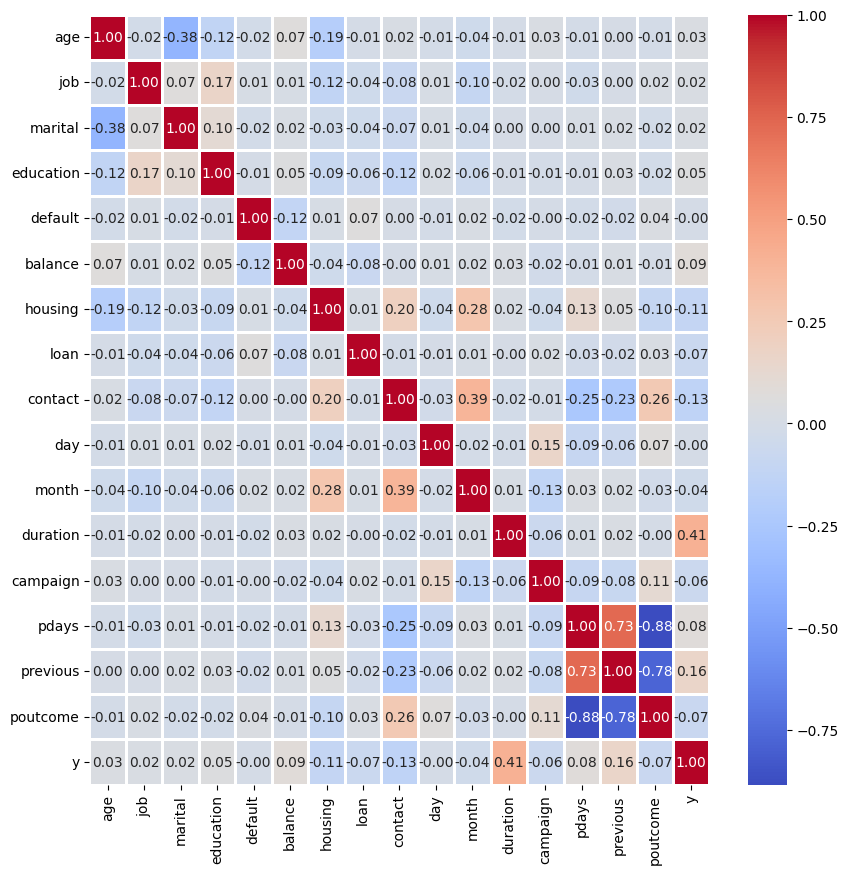

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset_scaler.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

In [27]:
class_data = dataset_scaler['y']
features = dataset_scaler.drop('y', axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, class_data, test_size=0.2, random_state=42)

In [29]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

under_sampling = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampling.fit_resample(X_train, y_train)

over_sampling = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampling.fit_resample(X_train, y_train)

c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  Fi

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

models_results = pd.DataFrame(columns=["Model", 'Accuracy', 'F1 Score', 'AUC', 'Average Precision Score'])
# Evaluate models with default parameters
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("=============================================================")
    print(f"{name} Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"{name} F1 Score: {f1_score(y_test, predictions)}")
    print(f"{name} AUC: {roc_auc_score(y_test, predictions)}")
    print(f"{name} Average Precision Score: {average_precision_score(y_test, predictions)}")
   
    print(f"{name} Classification Report: \n{classification_report(y_test, predictions)}")
    print(f"{name} Confusion Matrix: \n{confusion_matrix(y_test, predictions)}")
    print("\n\n")
    new_results = pd.DataFrame({"Model":f'original {name}', 'Accuracy': accuracy_score(y_test, predictions), 'F1 Score': f1_score(y_test, predictions), 'AUC': roc_auc_score(y_test, predictions), 'Average Precision Score': average_precision_score(y_test, predictions)}, index=[0])
    models_results = pd.concat([models_results, new_results])
    
models_results

C:\Users\lucas\AppData\Local\Temp\ipykernel_11256\1901842322.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_results = pd.concat([models_results, new_results])


Logistic Regression Accuracy: 0.8945454545454545
Logistic Regression F1 Score: 0.2809917355371901
Logistic Regression AUC: 0.5861835342491357
Logistic Regression Average Precision Score: 0.18254963427377222
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       738
         1.0       0.50      0.20      0.28        87

    accuracy                           0.89       825
   macro avg       0.71      0.59      0.61       825
weighted avg       0.87      0.89      0.87       825

Logistic Regression Confusion Matrix: 
[[721  17]
 [ 70  17]]



K-Nearest Neighbors Accuracy: 0.896969696969697
K-Nearest Neighbors F1 Score: 0.2608695652173913
K-Nearest Neighbors AUC: 0.5773993084758434
K-Nearest Neighbors Average Precision Score: 0.17963725929243168
K-Nearest Neighbors Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       73

c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Neural Network Accuracy: 0.9018181818181819
Neural Network F1 Score: 0.425531914893617
Neural Network AUC: 0.6561536305018223
Neural Network Average Precision Score: 0.2606617903169628
Neural Network Classification Report: 
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       738
         1.0       0.56      0.34      0.43        87

    accuracy                           0.90       825
   macro avg       0.74      0.66      0.69       825
weighted avg       0.89      0.90      0.89       825

Neural Network Confusion Matrix: 
[[714  24]
 [ 57  30]]



AdaBoost Accuracy: 0.8945454545454545
AdaBoost F1 Score: 0.3916083916083916
AdaBoost AUC: 0.6419493505279881
AdaBoost Average Precision Score: 0.23243469174503656
AdaBoost Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       738
         1.0       0.50      0.32      0.39        87

    accuracy                 

,Model,Accuracy,F1 Score,AUC,Average Precision Score
0,original Logistic Regression,0.894545,0.280992,0.586184,0.182550
0,original K-Nearest Neighbors,0.896970,0.260870,0.577399,0.179637
0,original Support Vector Machine,0.901818,0.181818,0.549692,0.172132
0,original Decision Tree,0.872727,0.455959,0.710868,0.262054
0,original Random Forest,0.905455,0.426471,0.653117,0.267582
0,original Gradient Boosting,0.907879,0.464789,0.674750,0.293041
0,original Naive Bayes,0.854545,0.411765,0.690566,0.227843
0,original Neural Network,0.901818,0.425532,0.656154,0.260662
0,original AdaBoost,0.894545,0.391608,0.641949,0.232435
0,original Extra Trees,0.913939,0.440945,0.652789,0.296803


In [31]:
models_results_smoke = pd.DataFrame(columns=["Model", 'Accuracy', 'F1 Score', 'AUC', 'Average Precision Score'])
# Evaluate models with default parameters
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    predictions = model.predict(X_test)
    print("=============================================================")
    print(f"{name} Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"{name} F1 Score: {f1_score(y_test, predictions)}")
    print(f"{name} AUC: {roc_auc_score(y_test, predictions)}")
    print(f"{name} Average Precision Score: {average_precision_score(y_test, predictions)}")
   
    print(f"{name} Classification Report: \n{classification_report(y_test, predictions)}")
    print(f"{name} Confusion Matrix: \n{confusion_matrix(y_test, predictions)}")
    print("\n\n")
    new_results = pd.DataFrame({"Model":f'smoke {name}', 'Accuracy': accuracy_score(y_test, predictions), 'F1 Score': f1_score(y_test, predictions), 'AUC': roc_auc_score(y_test, predictions), 'Average Precision Score': average_precision_score(y_test, predictions)}, index=[0])
    models_results_smoke = pd.concat([models_results_smoke, new_results])
    
models_results_smoke

Logistic Regression Accuracy: 0.7951515151515152
Logistic Regression F1 Score: 0.43853820598006643
Logistic Regression AUC: 0.7790393421175591
Logistic Regression Average Precision Score: 0.25942167403978555
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.87       738
         1.0       0.31      0.76      0.44        87

    accuracy                           0.80       825
   macro avg       0.64      0.78      0.66       825
weighted avg       0.90      0.80      0.83       825

Logistic Regression Confusion Matrix: 
[[590 148]
 [ 21  66]]



K-Nearest Neighbors Accuracy: 0.8072727272727273
K-Nearest Neighbors F1 Score: 0.40892193308550184
K-Nearest Neighbors AUC: 0.7300485935893842
K-Nearest Neighbors Average Precision Score: 0.2298324663841905
K-Nearest Neighbors Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88       

C:\Users\lucas\AppData\Local\Temp\ipykernel_11256\2831612650.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_results_smoke = pd.concat([models_results_smoke, new_results])


Support Vector Machine Accuracy: 0.8121212121212121
Support Vector Machine F1 Score: 0.45229681978798586
Support Vector Machine AUC: 0.77838519764508
Support Vector Machine Average Precision Score: 0.2680852152773335
Support Vector Machine Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89       738
         1.0       0.33      0.74      0.45        87

    accuracy                           0.81       825
   macro avg       0.64      0.78      0.67       825
weighted avg       0.90      0.81      0.84       825

Support Vector Machine Confusion Matrix: 
[[606 132]
 [ 23  64]]



Decision Tree Accuracy: 0.8412121212121212
Decision Tree F1 Score: 0.4072398190045249
Decision Tree AUC: 0.6983225866741426
Decision Tree Average Precision Score: 0.22460955411032613
Decision Tree Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       738
         1.

c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Neural Network Accuracy: 0.8193939393939393
Neural Network F1 Score: 0.4620938628158845
Neural Network AUC: 0.7824502382954863
Neural Network Average Precision Score: 0.2756706814057086
Neural Network Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89       738
         1.0       0.34      0.74      0.46        87

    accuracy                           0.82       825
   macro avg       0.65      0.78      0.68       825
weighted avg       0.90      0.82      0.85       825

Neural Network Confusion Matrix: 
[[612 126]
 [ 23  64]]



AdaBoost Accuracy: 0.863030303030303
AdaBoost F1 Score: 0.5232067510548524
AdaBoost AUC: 0.7967012428744977
AdaBoost Average Precision Score: 0.32486241727621035
AdaBoost Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       738
         1.0       0.41      0.71      0.52        87

    accuracy                 

,Model,Accuracy,F1 Score,AUC,Average Precision Score
0,smoke Logistic Regression,0.795152,0.438538,0.779039,0.259422
0,smoke K-Nearest Neighbors,0.807273,0.408922,0.730049,0.229832
0,smoke Support Vector Machine,0.812121,0.452297,0.778385,0.268085
0,smoke Decision Tree,0.841212,0.407240,0.698323,0.224610
0,smoke Random Forest,0.900606,0.539326,0.746729,0.338292
0,smoke Gradient Boosting,0.881212,0.542056,0.786585,0.339613
0,smoke Naive Bayes,0.684848,0.359606,0.752874,0.208985
0,smoke Neural Network,0.819394,0.462094,0.782450,0.275671
0,smoke AdaBoost,0.863030,0.523207,0.796701,0.324862
0,smoke Extra Trees,0.901818,0.531792,0.737268,0.332509


In [32]:
models_results_under = pd.DataFrame(columns=["Model", 'Accuracy', 'F1 Score', 'AUC', 'Average Precision Score'])
# Evaluate models with default parameters
for name, model in models.items():
    model.fit(X_train_under, y_train_under)
    predictions = model.predict(X_test)
    print("=============================================================")
    print(f"{name} Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"{name} F1 Score: {f1_score(y_test, predictions)}")
    print(f"{name} AUC: {roc_auc_score(y_test, predictions)}")
    print(f"{name} Average Precision Score: {average_precision_score(y_test, predictions)}")
   
    print(f"{name} Classification Report: \n{classification_report(y_test, predictions)}")
    print(f"{name} Confusion Matrix: \n{confusion_matrix(y_test, predictions)}")
    print("\n\n")
    new_results = pd.DataFrame({"Model":f'under {name}', 'Accuracy': accuracy_score(y_test, predictions), 'F1 Score': f1_score(y_test, predictions), 'AUC': roc_auc_score(y_test, predictions), 'Average Precision Score': average_precision_score(y_test, predictions)}, index=[0])
    models_results_under = pd.concat([models_results_under, new_results])
    
models_results_under

Logistic Regression Accuracy: 0.7866666666666666
Logistic Regression F1 Score: 0.42483660130718953
Logistic Regression AUC: 0.769227175030371
Logistic Regression Average Precision Score: 0.24841652233244108
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87       738
         1.0       0.30      0.75      0.42        87

    accuracy                           0.79       825
   macro avg       0.63      0.77      0.65       825
weighted avg       0.89      0.79      0.82       825

Logistic Regression Confusion Matrix: 
[[584 154]
 [ 22  65]]



K-Nearest Neighbors Accuracy: 0.72
K-Nearest Neighbors F1 Score: 0.32653061224489793
K-Nearest Neighbors AUC: 0.6863377254462201
K-Nearest Neighbors Average Precision Score: 0.178380355276907
K-Nearest Neighbors Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82       738
         1.0

C:\Users\lucas\AppData\Local\Temp\ipykernel_11256\172809194.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_results_under = pd.concat([models_results_under, new_results])


Random Forest Accuracy: 0.7806060606060606
Random Forest F1 Score: 0.44984802431610943
Random Forest AUC: 0.8114662181104569
Random Forest Average Precision Score: 0.27585066970646904
Random Forest Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86       738
         1.0       0.31      0.85      0.45        87

    accuracy                           0.78       825
   macro avg       0.64      0.81      0.66       825
weighted avg       0.91      0.78      0.82       825

Random Forest Confusion Matrix: 
[[570 168]
 [ 13  74]]



Gradient Boosting Accuracy: 0.7842424242424243
Gradient Boosting F1 Score: 0.4506172839506173
Gradient Boosting AUC: 0.8084291187739463
Gradient Boosting Average Precision Score: 0.27542064027441593
Gradient Boosting Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       738
         1.0       0.31      0.84      0.4

c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,F1 Score,AUC,Average Precision Score
0,under Logistic Regression,0.786667,0.424837,0.769227,0.248417
0,under K-Nearest Neighbors,0.720000,0.326531,0.686338,0.178380
0,under Support Vector Machine,0.786667,0.424837,0.769227,0.248417
0,under Decision Tree,0.720000,0.330435,0.691407,0.181111
0,under Random Forest,0.780606,0.449848,0.811466,0.275851
0,under Gradient Boosting,0.784242,0.450617,0.808429,0.275421
0,under Naive Bayes,0.787879,0.414716,0.754696,0.238718
0,under Neural Network,0.785455,0.427184,0.773619,0.250990
0,under AdaBoost,0.807273,0.464646,0.801023,0.282409
0,under Extra Trees,0.779394,0.420382,0.770232,0.246023


In [33]:
models_results_over = pd.DataFrame(columns=["Model", 'Accuracy', 'F1 Score', 'AUC', 'Average Precision Score'])
# Evaluate models with default parameters
for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    predictions = model.predict(X_test)
    print("=============================================================")
    print(f"{name} Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"{name} F1 Score: {f1_score(y_test, predictions)}")
    print(f"{name} AUC: {roc_auc_score(y_test, predictions)}")
    print(f"{name} Average Precision Score: {average_precision_score(y_test, predictions)}")
   
    print(f"{name} Classification Report: \n{classification_report(y_test, predictions)}")
    print(f"{name} Confusion Matrix: \n{confusion_matrix(y_test, predictions)}")
    print("\n\n")
    new_results = pd.DataFrame({"Model":f'over {name}', 'Accuracy': accuracy_score(y_test, predictions), 'F1 Score': f1_score(y_test, predictions), 'AUC': roc_auc_score(y_test, predictions), 'Average Precision Score': average_precision_score(y_test, predictions)}, index=[0])
    models_results_over = pd.concat([models_results_over, new_results])
    
models_results_over

Logistic Regression Accuracy: 0.7854545454545454
Logistic Regression F1 Score: 0.43086816720257237
Logistic Regression AUC: 0.7786889075787309
Logistic Regression Average Precision Score: 0.25458930437378713
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87       738
         1.0       0.30      0.77      0.43        87

    accuracy                           0.79       825
   macro avg       0.63      0.78      0.65       825
weighted avg       0.90      0.79      0.82       825

Logistic Regression Confusion Matrix: 
[[581 157]
 [ 20  67]]



K-Nearest Neighbors Accuracy: 0.816969696969697
K-Nearest Neighbors F1 Score: 0.4031620553359684
K-Nearest Neighbors AUC: 0.7151901691430708
K-Nearest Neighbors Average Precision Score: 0.2237360728179174
K-Nearest Neighbors Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89       73

C:\Users\lucas\AppData\Local\Temp\ipykernel_11256\3497778411.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_results_over = pd.concat([models_results_over, new_results])


Support Vector Machine Accuracy: 0.816969696969697
Support Vector Machine F1 Score: 0.4664310954063604
Support Vector Machine AUC: 0.7912344640687786
Support Vector Machine Average Precision Score: 0.28090845115475654
Support Vector Machine Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89       738
         1.0       0.34      0.76      0.47        87

    accuracy                           0.82       825
   macro avg       0.65      0.79      0.68       825
weighted avg       0.90      0.82      0.84       825

Support Vector Machine Confusion Matrix: 
[[608 130]
 [ 21  66]]



Decision Tree Accuracy: 0.8751515151515151
Decision Tree F1 Score: 0.4180790960451977
Decision Tree AUC: 0.6767358190823288
Decision Tree Average Precision Score: 0.2354464182050389
Decision Tree Classification Report: 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       738
         1.

c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Neural Network Accuracy: 0.8072727272727273
Neural Network F1 Score: 0.4536082474226804
Neural Network AUC: 0.7858144098682366
Neural Network Average Precision Score: 0.2708906509312189
Neural Network Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       738
         1.0       0.32      0.76      0.45        87

    accuracy                           0.81       825
   macro avg       0.64      0.79      0.67       825
weighted avg       0.90      0.81      0.84       825

Neural Network Confusion Matrix: 
[[600 138]
 [ 21  66]]



AdaBoost Accuracy: 0.8315151515151515
AdaBoost F1 Score: 0.5017921146953405
AdaBoost AUC: 0.8196430240164472
AdaBoost Average Precision Score: 0.31394897248345527
AdaBoost Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       738
         1.0       0.36      0.80      0.50        87

    accuracy                

,Model,Accuracy,F1 Score,AUC,Average Precision Score
0,over Logistic Regression,0.785455,0.430868,0.778689,0.254589
0,over K-Nearest Neighbors,0.816970,0.403162,0.715190,0.223736
0,over Support Vector Machine,0.816970,0.466431,0.791234,0.280908
0,over Decision Tree,0.875152,0.418079,0.676736,0.235446
0,over Random Forest,0.910303,0.519481,0.711592,0.331459
0,over Gradient Boosting,0.832727,0.507143,0.825390,0.319614
0,over Naive Bayes,0.776970,0.410256,0.758738,0.237125
0,over Neural Network,0.807273,0.453608,0.785814,0.270891
0,over AdaBoost,0.831515,0.501792,0.819643,0.313949
0,over Extra Trees,0.912727,0.419355,0.641973,0.283943


In [34]:
models_results.index = models_results['Model']
models_results.drop('Model', axis=1, inplace=True)

models_results_smoke.index = models_results_smoke['Model']
models_results_smoke.drop('Model', axis=1, inplace=True)

models_results_under.index = models_results_under['Model']
models_results_under.drop('Model', axis=1, inplace=True)

models_results_over.index = models_results_over['Model']
models_results_over.drop('Model', axis=1, inplace=True)



In [35]:
models_results.sort_values(['Accuracy', 'F1 Score'], ascending=False, inplace=True)
models_results

models_results_smoke.sort_values(['Accuracy', 'F1 Score'], ascending=False, inplace=True)
models_results_smoke

models_results_under.sort_values(['Accuracy', 'F1 Score'], ascending=False, inplace=True)
models_results_under

models_results_over.sort_values(['Accuracy', 'F1 Score'], ascending=False, inplace=True)
models_results_over

,Accuracy,F1 Score,AUC,Average Precision Score
Model,,,,
over Extra Trees,0.912727,0.419355,0.641973,0.283943
over Random Forest,0.910303,0.519481,0.711592,0.331459
over Decision Tree,0.875152,0.418079,0.676736,0.235446
over Gradient Boosting,0.832727,0.507143,0.825390,0.319614
over AdaBoost,0.831515,0.501792,0.819643,0.313949
over Support Vector Machine,0.816970,0.466431,0.791234,0.280908
over K-Nearest Neighbors,0.816970,0.403162,0.715190,0.223736
over Neural Network,0.807273,0.453608,0.785814,0.270891
over Logistic Regression,0.785455,0.430868,0.778689,0.254589


<Axes: xlabel='Model'>

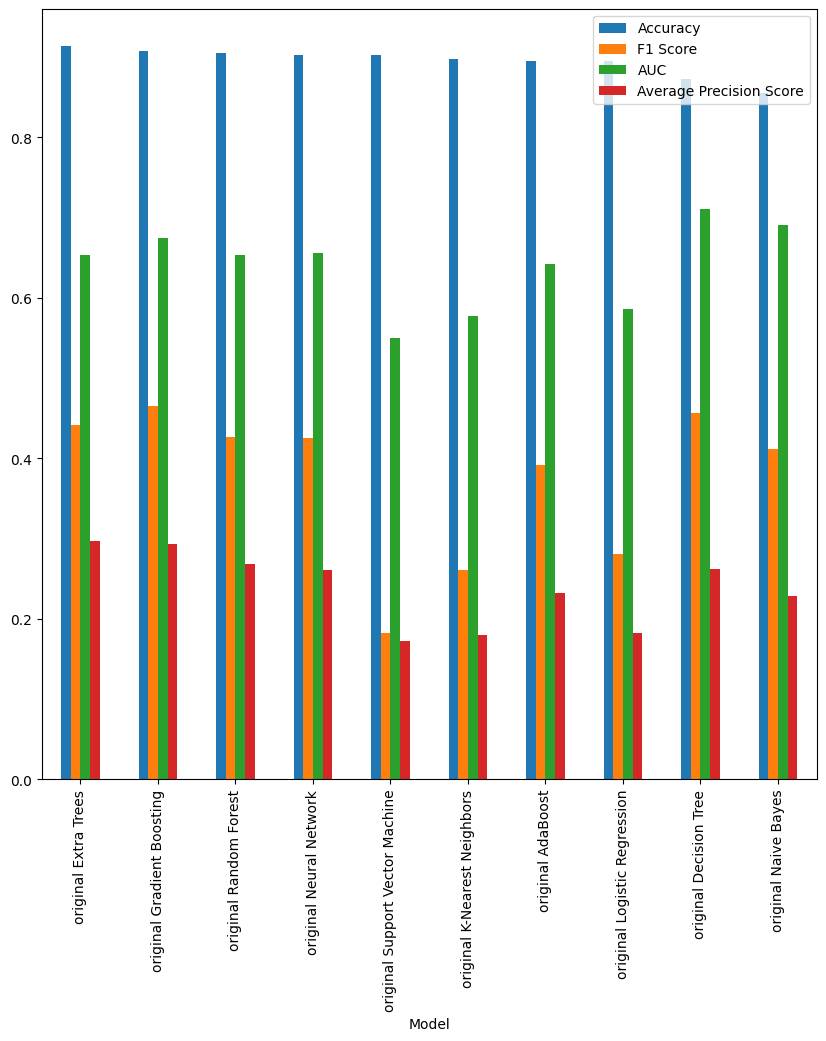

In [36]:
models_results.plot(kind='bar', figsize=(10, 10))

<Axes: xlabel='Model'>

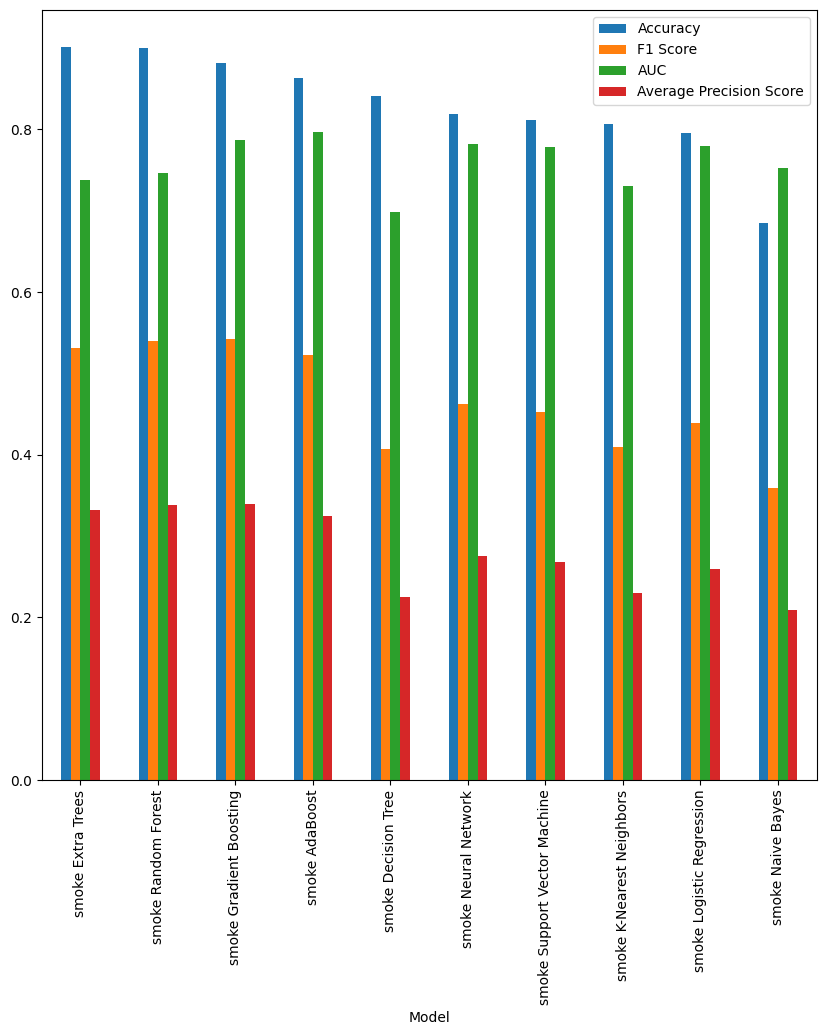

In [37]:
models_results_smoke.plot(kind='bar', figsize=(10, 10))

<Axes: xlabel='Model'>

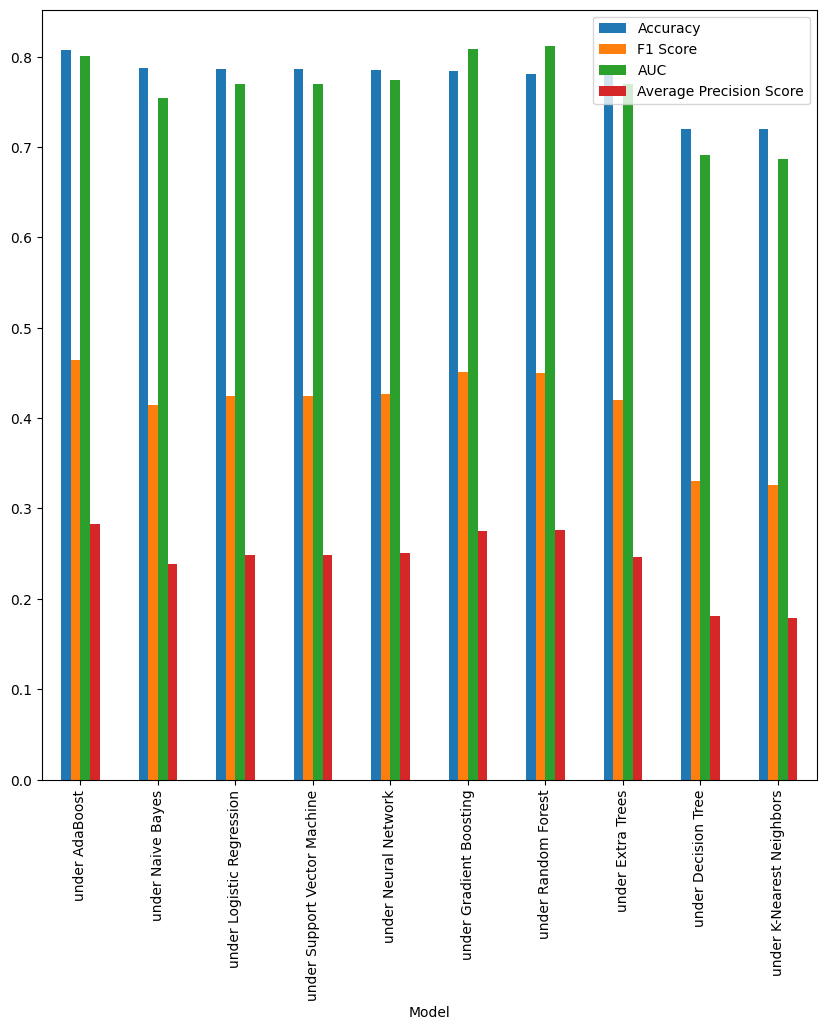

In [38]:
models_results_under.plot(kind='bar', figsize=(10, 10))

<Axes: xlabel='Model'>

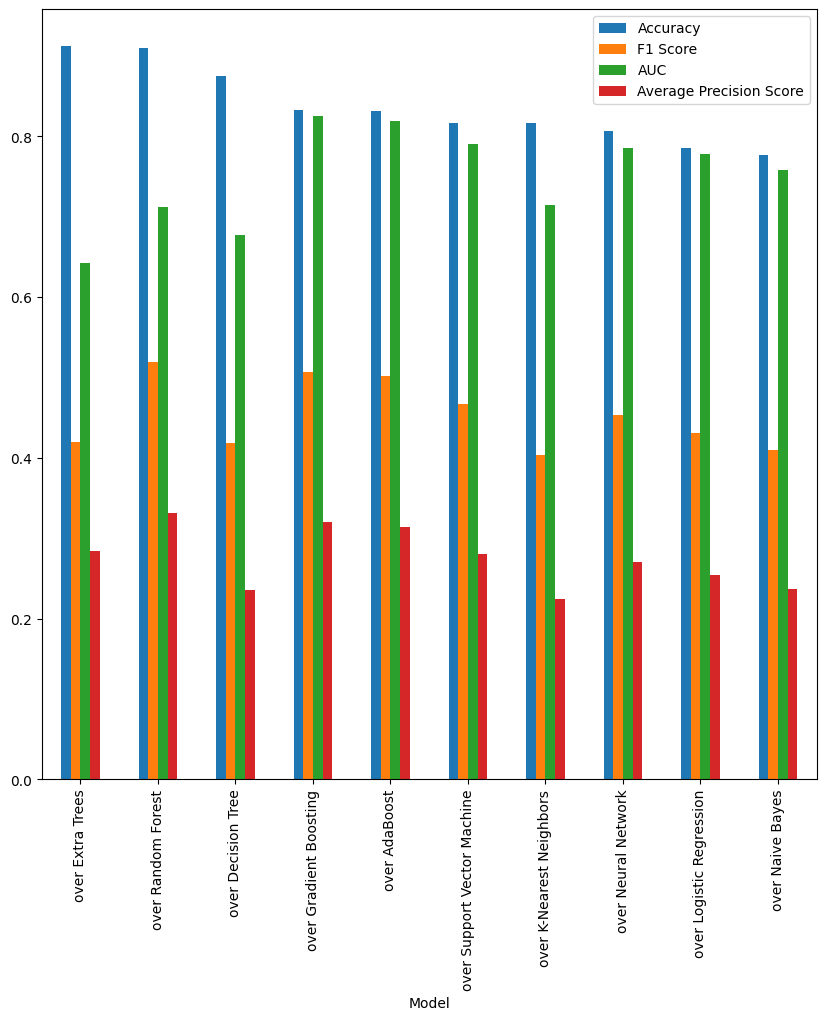

In [39]:
models_results_over.plot(kind='bar', figsize=(10, 10))

In [40]:
all_models = pd.concat([models_results, models_results_smoke, models_results_under, models_results_over], axis=0)
all_models

,Accuracy,F1 Score,AUC,Average Precision Score
Model,,,,
original Extra Trees,0.913939,0.440945,0.652789,0.296803
original Gradient Boosting,0.907879,0.464789,0.674750,0.293041
original Random Forest,0.905455,0.426471,0.653117,0.267582
original Neural Network,0.901818,0.425532,0.656154,0.260662
original Support Vector Machine,0.901818,0.181818,0.549692,0.172132
original K-Nearest Neighbors,0.896970,0.260870,0.577399,0.179637
original AdaBoost,0.894545,0.391608,0.641949,0.232435
original Logistic Regression,0.894545,0.280992,0.586184,0.182550
original Decision Tree,0.872727,0.455959,0.710868,0.262054


In [41]:
all_models.sort_values(['Accuracy', 'F1 Score'], ascending=False, inplace=True)
all_models

,Accuracy,F1 Score,AUC,Average Precision Score
Model,,,,
original Extra Trees,0.913939,0.440945,0.652789,0.296803
over Extra Trees,0.912727,0.419355,0.641973,0.283943
over Random Forest,0.910303,0.519481,0.711592,0.331459
original Gradient Boosting,0.907879,0.464789,0.674750,0.293041
original Random Forest,0.905455,0.426471,0.653117,0.267582
smoke Extra Trees,0.901818,0.531792,0.737268,0.332509
original Neural Network,0.901818,0.425532,0.656154,0.260662
original Support Vector Machine,0.901818,0.181818,0.549692,0.172132
smoke Random Forest,0.900606,0.539326,0.746729,0.338292


In [42]:

"""from matplotlib.pylab import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=1000)

# Define the parameter distribution
param_dist = {
    'hidden_layer_sizes': [(84, 42, 16, 1), (64, 32, 16, 8, 1), (32, 16, 8, 1)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [uniform(0.0001, 0.05)],
    'learning_rate': ['constant','adaptive'],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Fit the randomized search to the data
random_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Predict and evaluate
predictions = best_model.predict(X_test)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

"""

'from matplotlib.pylab import uniform\nfrom scipy.stats import randint\nfrom sklearn.model_selection import RandomizedSearchCV, GridSearchCV\nfrom sklearn.neural_network import MLPClassifier\n\nmodel = MLPClassifier(max_iter=1000)\n\n# Define the parameter distribution\nparam_dist = {\n    \'hidden_layer_sizes\': [(84, 42, 16, 1), (64, 32, 16, 8, 1), (32, 16, 8, 1)],\n    \'activation\': [\'tanh\', \'relu\'],\n    \'solver\': [\'sgd\', \'adam\'],\n    \'alpha\': [uniform(0.0001, 0.05)],\n    \'learning_rate\': [\'constant\',\'adaptive\'],\n}\n\n# Initialize RandomizedSearchCV\nrandom_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)\n\n# Fit the randomized search to the data\nrandom_search.fit(X_train_smote, y_train_smote)\n\n# Get the best parameters and best model\nbest_params = random_search.best_params_\nbest_model = random_search.best_estimator_\n\n# Predict and evaluate\npredictions = best_model.p

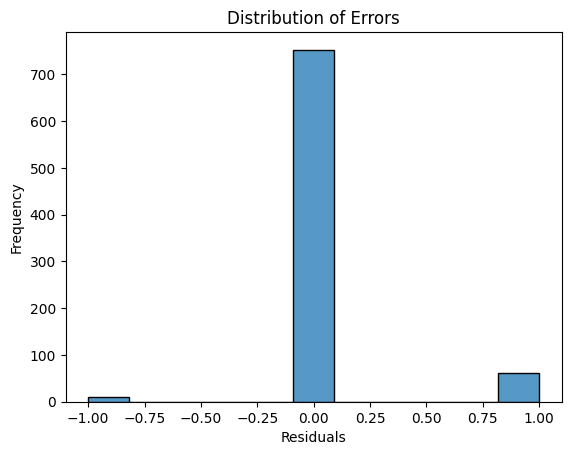

In [43]:
residuals = y_test - predictions
sns.histplot(residuals, edgecolor='black', )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()